<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/3_Project/1_EDA_Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-live dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:
- Create Jupyter Notebookss (showcasing core skills in Python).
- Create a summary page (via [README.md](README.md)) capturing your findings.
- Share this project via GitHub & LinkedIn.

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I'll be focusing on US Data Analyst roles, but you can adapt to any of the following:



## Exploratory Data Analysis for all Data Roles

### Roles to Explore

In [83]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


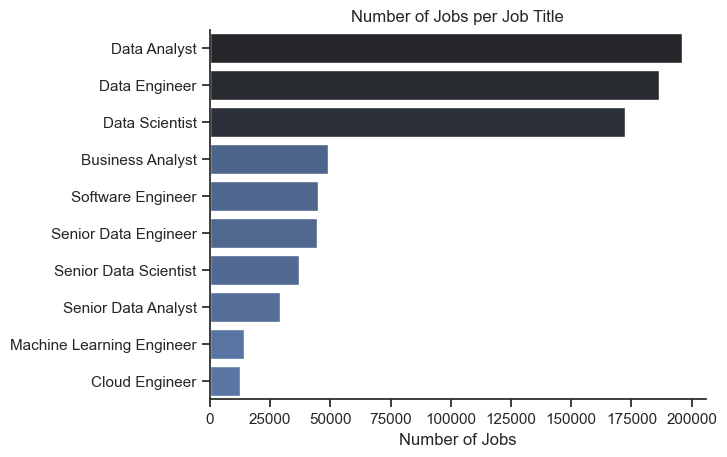

In [84]:
jobs_df = df.value_counts(subset='job_title_short').to_frame().copy()

sns.set_theme(style='ticks')
sns.barplot(data=jobs_df, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Number of Jobs per Job Title')
plt.show()

### Countries to Explore

Text(0.5, 0, 'Number of Jobs')

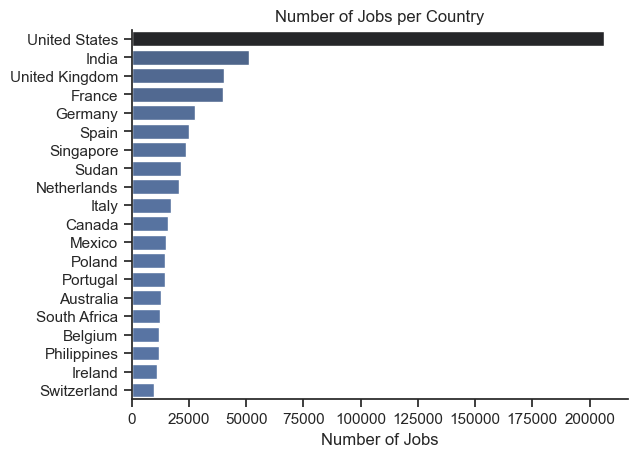

In [85]:
country_df = df.value_counts(subset='job_country').head(20).to_frame().copy()

sns.set_theme(style='ticks')
sns.barplot(data=country_df, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.ylabel('')
plt.xlabel('Number of Jobs')

### Companies to Explore

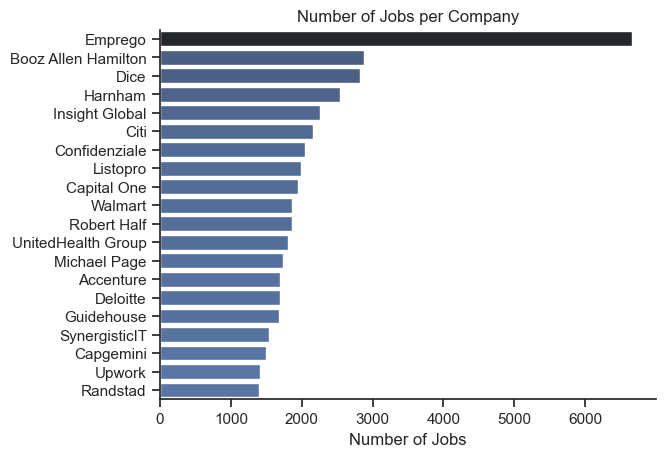

In [86]:
df_plot = df['company_name'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

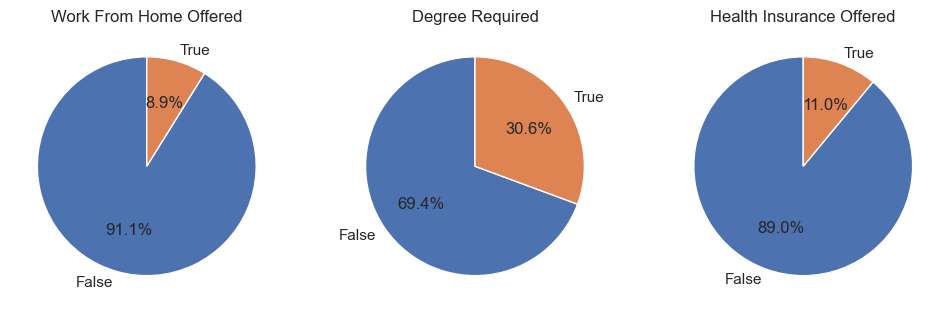

In [87]:
fig, ax = plt.subplots(1, 3, figsize=(12,18))
sns.set_theme(style='ticks')

wfh_df = df.value_counts('job_work_from_home').to_frame().copy()
degree_df = df.value_counts('job_no_degree_mention').to_frame().copy()
health_df = df.value_counts('job_health_insurance').to_frame().copy()

wfh_df.plot(kind='pie', y='count', ax=ax[0], startangle=90, legend=False, autopct='%1.1f%%', title='Work From Home Offered')
ax[0].set_ylabel('')
degree_df.plot(kind='pie', y='count', ax=ax[1], startangle=90, legend=False, autopct='%1.1f%%', title='Degree Required')
ax[1].set_ylabel('')
health_df.plot(kind='pie', y='count', ax=ax[2], startangle=90, legend=False, autopct='%1.1f%%', title='Health Insurance Offered')
ax[2].set_ylabel('')

plt.show()

## Exploratory Data Analysis for Data Analysts in the US

In [88]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for US Data Analyst roles

In [89]:
usa_data_df = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

### Locations to Explore:

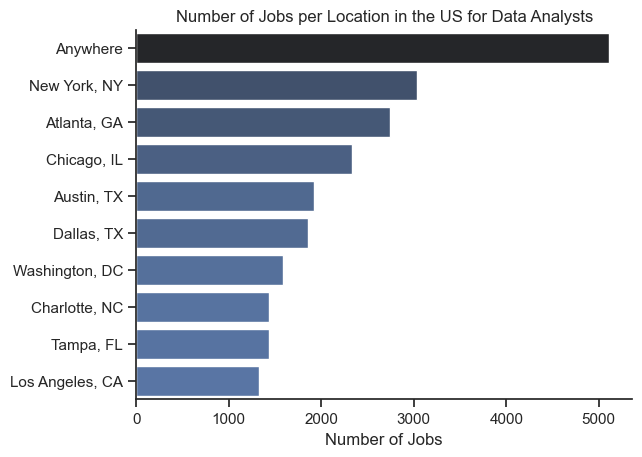

In [90]:
location_df = usa_data_df.value_counts(subset='job_location').head(10).to_frame().copy()

sns.set_theme(style='ticks')
sns.barplot(data=location_df, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Number of Jobs per Location in the US for Data Analysts')
plt.show()

### Job Opportunities

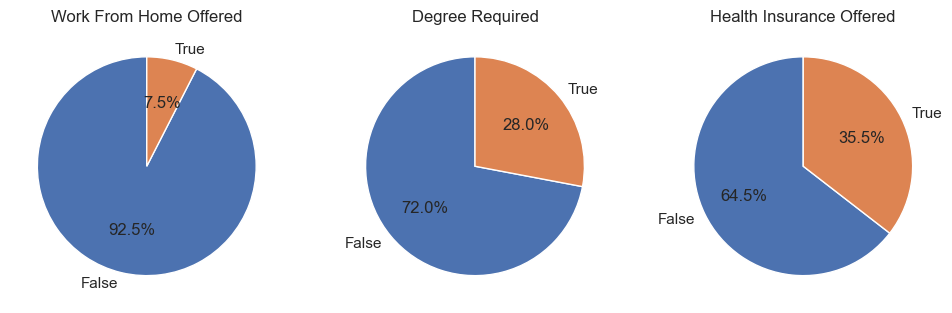

In [91]:
fig, ax = plt.subplots(1, 3, figsize=(12,18))
sns.set_theme(style='ticks')

wfh_df = usa_data_df.value_counts('job_work_from_home').to_frame().copy()
degree_df = usa_data_df.value_counts('job_no_degree_mention').to_frame().copy()
health_df = usa_data_df.value_counts('job_health_insurance').to_frame().copy()

wfh_df.plot(kind='pie', y='count', ax=ax[0], startangle=90, legend=False, autopct='%1.1f%%', title='Work From Home Offered')
ax[0].set_ylabel('')
degree_df.plot(kind='pie', y='count', ax=ax[1], startangle=90, legend=False, autopct='%1.1f%%', title='Degree Required')
ax[1].set_ylabel('')
health_df.plot(kind='pie', y='count', ax=ax[2], startangle=90, legend=False, autopct='%1.1f%%', title='Health Insurance Offered')
ax[2].set_ylabel('')

plt.show()

### Companies to Explore:

Text(0.5, 1.0, 'Job Counts of Companies for Data Analysts in the US')

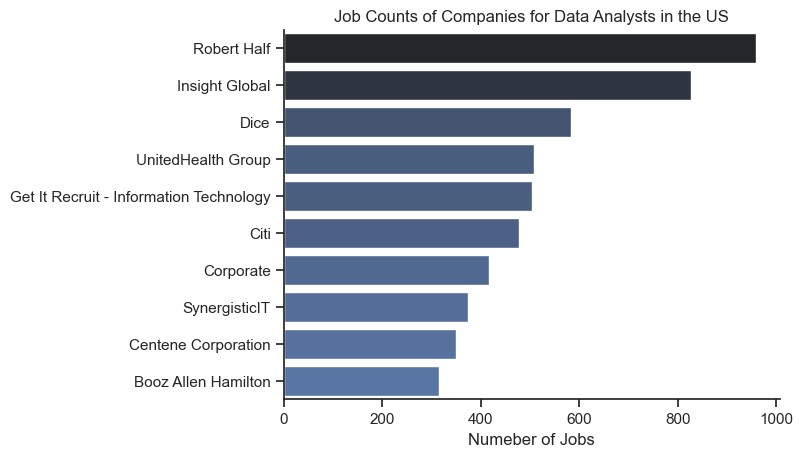

In [92]:
comp_df = usa_data_df.value_counts(subset='company_name').head(10).to_frame().copy()

sns.barplot(data=comp_df, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.xlabel('Numeber of Jobs')
plt.ylabel('')
plt.title('Job Counts of Companies for Data Analysts in the US')